# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [92]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [93]:
browser = Browser('chrome')

In [94]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

In [95]:
mars_table = pd.read_html(url)
mars_table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [96]:
# Create a Beautiful Soup Object
weather = browser.html
weather_soup = soup(html, 'html.parser')

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=109.0.5414.75)
Stacktrace:
Backtrace:
	(No symbol) [0x0021F243]
	(No symbol) [0x001A7FD1]
	(No symbol) [0x0009D04D]
	(No symbol) [0x00082D7A]
	(No symbol) [0x000EBE7B]
	(No symbol) [0x000FC196]
	(No symbol) [0x000E8386]
	(No symbol) [0x000C163C]
	(No symbol) [0x000C269D]
	GetHandleVerifier [0x004B9A22+2655074]
	GetHandleVerifier [0x004ACA24+2601828]
	GetHandleVerifier [0x002C8C0A+619850]
	GetHandleVerifier [0x002C7830+614768]
	(No symbol) [0x001B05FC]
	(No symbol) [0x001B5968]
	(No symbol) [0x001B5A55]
	(No symbol) [0x001C051B]
	BaseThreadInitThunk [0x765F00F9+25]
	RtlGetAppContainerNamedObjectPath [0x77407BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77407B8E+238]
	(No symbol) [0x00000000]


In [ ]:
# Find Table
mars_table = pd.read_html(url)
mars_table 

# scrape header
header_el = weather_soup.find_all('th')
header_row = []
for element in header_el:
    header = element.text
    header_row.append(header)

header_row

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [ ]:
# Extract all rows of data 
mars_table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [ ]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = mars_table[0]
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [ ]:
# Close automated browsing session 
browser.quit()

In [ ]:
# Confirm DataFrame was created successfully & Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [ ]:
# Examine data type of each column


In [ ]:
# Change data types for data analysis
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

In [ ]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [ ]:
# 1. How many months are there on Mars?
mars_no_of_months = mars_df['month'].nunique()
print(f'Mars has ', mars_no_of_months, 'months.')

Mars has  12 months.


In [ ]:
# 2. How many Martian days' worth of data are there?
martian_days = len(mars_df["sol"].unique())
print(f'Due to analysis of the scraped data showing the data was not captured for some days in the month all the unique days (sol) were pulled for accuracy showing there are', martian_days, 'days.')

Due to analysis of the scraped data showing the data was not captured for some days in the month all the unique days (sol) were pulled for accuracy showing there are 1867 days.


In [99]:
# 3. What is the average low temperature by month?
avg_min_tempdf = mars_df.groupby("month").mean()
avg_min_tempdf

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


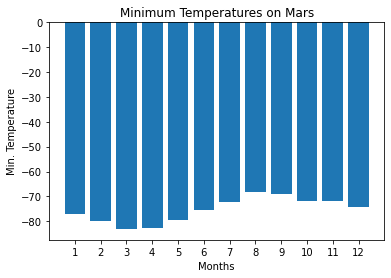

In [100]:
# Plot the average temperature by month
months = np.arange(1, 13, 1)

x = months
y = avg_min_tempdf["min_temp"]

plt.bar(x, y)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Min. Temperature")
plt.title("Minimum Temperatures on Mars")
plt.show()

In [119]:
# Identify the coldest months 
avg_temp_min = avg_min_tempdf['min_temp'].min()
min_temp_month = avg_min_tempdf.loc[avg_min_tempdf[ 'min_temp'] == avg_temp_min]
print(f'The Coldest Month is March as it is Month 3')
min_temp_month

The Coldest Month is March as it is Month 3


,id,sol,ls,min_temp,pressure
month,,,,,
3,1132.697917,1204.40625,75.010417,-83.307292,877.322917


In [120]:
# Identify the hottest Months
avg_temp_max = avg_min_tempdf['min_temp'].max()
max_temp_month = avg_min_tempdf.loc[avg_min_tempdf[ 'min_temp'] == avg_temp_max]
print(f'The Hottest Month is August as it is Month 8')
max_temp_month

The Hottest Month is August as it is Month 8


,id,sol,ls,min_temp,pressure
month,,,,,
8,718.078014,795.333333,224.347518,-68.382979,873.829787


In [123]:
# 4. Average pressure by Martian month
press_month_df = mars_df[['month', 'pressure']].copy()
avg_press_by_month_df = press_month_df.groupby(['month']).mean()
avg_press_by_month_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


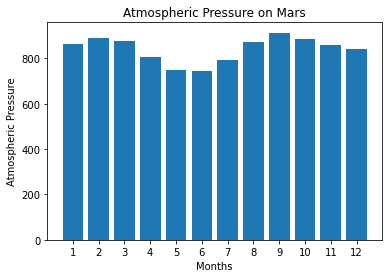

In [125]:
# Plot the average pressure by month
months = np.arange(1, 13, 1)

x = months
y = avg_min_tempdf["pressure"]

plt.bar(x, y)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Atmospheric Pressure")
plt.title("Atmospheric Pressure on Mars")
plt.show()

In [131]:
# 5.1 How many terrestrial (earth) days are there in a Martian year?

# Find the very first Solar Longitude (ls) in the scarpped dataset
first_ls = mars_df['ls'].loc[0]

# Select  records from the mars_df matching first_ls value
match_ls = mars_df.loc[mars_df['ls'] == first_ls]
match_ls



,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [132]:
# 5.2 Calculating the terrestrial earth days in martian year
total_terres_days = match_ls['terrestrial_date'].iloc[1] - match_ls['terrestrial_date'].loc[0]
total_terres_days

Timedelta('686 days 00:00:00')

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [127]:
# Write the data to a CSV
mars_df.to_csv('mars_temp_data.csv',index=False)

In [ ]:
browser.quit()